# Taller 3 - Aprendizaje no supervisado
## Catalina Piedrahita Jaramillo
## Daniel José Rueda Lobato
## Diego Andrés Valderrama

# DATASET - Ingresos de Adultos

Enlace Dataset: https://www.kaggle.com/wenruliu/adult-income-dataset

Sitio Oficial: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Explicación de variables: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [79]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install prince

In [ ]:
!pip install featuretools 

In [83]:
import seaborn as sns
import prince
import pprint

In [84]:
#Se lee el DataSet Original
df = pd.read_csv('/content/gdrive/My Drive/Data Science/EAFIT/Aprendizaje Automático/Trabajo1/Piedrahita - Valderrama - Rueda/Informe técnico III/Ingresos_de_Adultos.csv') #DataFrame Original

In [85]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [86]:
df.info() #Información de las variables del DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


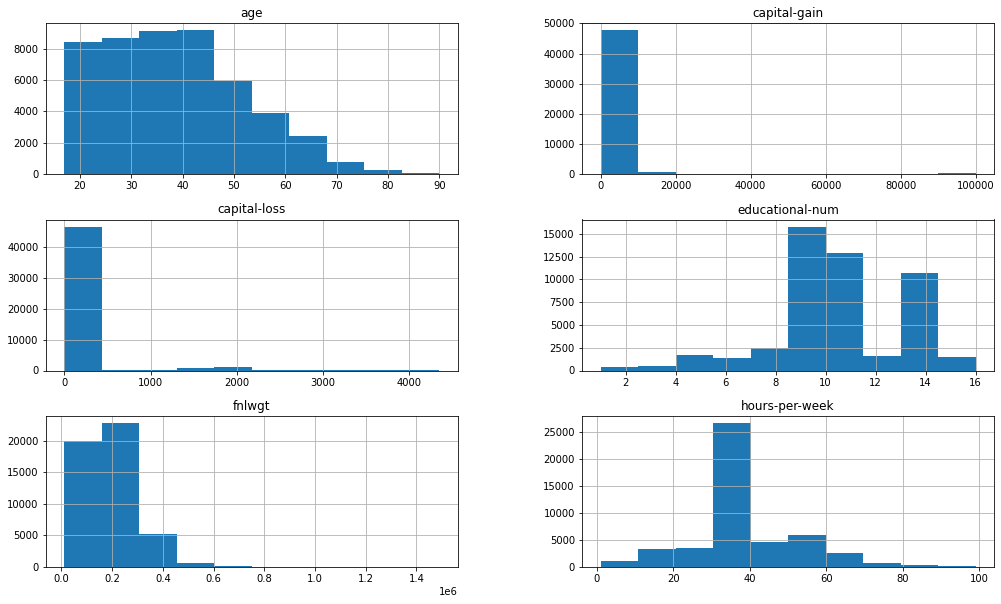

In [ ]:
#Observamos el comportamiento de las variables númericas.
df.hist(figsize=(17, 10))
plt.show()

In [87]:
print(df.columns.values)  # Nombre de las columnas que contiene  el dataset

['age' 'workclass' 'fnlwgt' 'education' 'educational-num' 'marital-status'
 'occupation' 'relationship' 'race' 'gender' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income']


Explicación de cada una de las variables



*   Age: continuous. (Edad)
*   Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. (Tipo de Trabajo)
*   fnlwgt: continuous. (Factor de Expansión)
*   Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. (Nivel Educativo)
*   Education-num: continuous (Número de años que ha estudiado)
*   Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. (Estado civil)
*   Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. (Ocupación)
*   Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. (Posición en la familia)
*   Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. (Raza)
*   Sex: Female, Male. (Sexo)
*   Capital-gain: continuous (Ganancia capital)
*   Capital-loss: continuous. (Pérdida capital)
*   hours-per-week: continuous. (Horas de trabajo por semana)
*   Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. (Pais de Origen)

In [88]:
# Estadistica descriptiva rápida de las variables
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [89]:
#Reemplazamos el caracter "?" el cual previamente analizamos que es "Missing Value" por Null
df['workclass'].replace('?', np.NaN, inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)
df['native-country'].replace('?', np.NaN, inplace=True)

In [90]:
# Encontramos las variables númericas
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Las variables númericas son :', numerical)

Las variables númericas son : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [91]:
# Identificamos los "Missing Values"
df[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [92]:
#Imputación de datos en variable categoricas, usando la moda
for df2 in [df]:
    df2['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
    df2['native-country'].fillna(df['native-country'].mode()[0], inplace=True)    

In [93]:
df2.shape

(48842, 15)

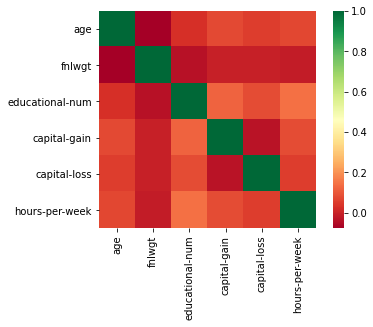

In [ ]:
# Revisamos la matriz de correlación de las variables númericas
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [94]:
# Se valida la diferencia de salarios mayores a 50K y menores a 50K (variable respuesta)
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [95]:
# Se divide la variables de entrada de la variable respuesta.
X = df2.drop(['income'], axis=1)
y = df2['income']

In [96]:
# Se reemplazan los valores de la variable respuesta por 0 y 1 para poder hacer comparaciones luego de las predicciones.
y_df = pd.DataFrame(y)
y_df['income'].replace('<=50K',0, inplace=True)
y_df['income'].replace('>50K',1, inplace=True)

In [97]:
#Función para forzar tipos, sin dummies 
infoTipos = pd.DataFrame()
infoTipos['campo'] = df.columns
infoTipos['tipo'] = df.dtypes.to_list()
infoTipos

,campo,tipo
0,age,int64
1,workclass,object
2,fnlwgt,int64
3,education,object
4,educational-num,int64
5,marital-status,object
6,occupation,object
7,relationship,object
8,race,object
9,gender,object


In [98]:
def forzar_tipos(df, info, estandarizar=0):
  from sklearn.preprocessing import StandardScaler
  list_float = list(info.campo[info['tipo'] == 'float64'])
  list_obj = list(info.campo[info['tipo'] == 'object'])
  list_int =  list(info.campo[info['tipo'] == 'int64'])
  df1 = pd.DataFrame()
  df1[list_obj] = df[list_obj].astype(object)
  df1[list_float] = df[list_float].astype(float) 
  df1[list_int] = df[list_int].astype(int) 
  if estandarizar == 1:
    df1[list_float] = StandardScaler().fit_transform(df1[list_float])
  return df1

In [104]:
dff=forzar_tipos(df, infoTipos, 0)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   workclass        48842 non-null  object
 1   education        48842 non-null  object
 2   marital-status   48842 non-null  object
 3   occupation       48842 non-null  object
 4   relationship     48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   native-country   48842 non-null  object
 8   income           48842 non-null  object
 9   age              48842 non-null  int64 
 10  fnlwgt           48842 non-null  int64 
 11  educational-num  48842 non-null  int64 
 12  capital-gain     48842 non-null  int64 
 13  capital-loss     48842 non-null  int64 
 14  hours-per-week   48842 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [100]:
# Utilizamos el método FAMD para identificar las componentes o variables principales, este método es apto también para variables categoricas, las cuales dumiza.
# Se parametriza con 104 componentes (que son las diferentes variables generadas al dumizar, 200 iteraciones)
famd = prince.FAMD(
     n_components=104,
     n_iter=200,
     copy=True,
     check_input=True,
     engine='auto',    
     random_state=42)

In [101]:
famd_1 = famd.fit(dff)

In [105]:
# Obtenemos los eigenvalues del modelo
eigenvalues_1 = famd_1.eigenvalues_
eigenvalues_1[0:104]

[645766.5204820818,
 140632.98041846647,
 54910.18488454607,
 47951.773475755406,
 38355.847826756144,
 34576.39562522224,
 30644.97209614274,
 27785.098570291266,
 24356.516989866206,
 22846.71485856066,
 21462.20423607891,
 17069.091744241632,
 16629.701746630722,
 15891.476245004069,
 13960.792676068739,
 12913.384844610167,
 12344.917082897853,
 10501.784118024352,
 9847.226014342266,
 9118.482480538374,
 8360.461716670245,
 7591.495257622969,
 7151.881886173215,
 6590.260209519081,
 6556.86230363648,
 6364.990918460339,
 5925.737493972376,
 5499.4708467937335,
 5191.360668636769,
 5159.201429815519,
 5023.919125286619,
 4730.243150944128,
 4604.159906161563,
 4517.065567773122,
 4189.917057642278,
 3889.9669922653943,
 3099.747370331318,
 2785.2901663557673,
 2574.950547480367,
 2280.833647782985,
 2230.6257280040404,
 2154.867625019057,
 2067.561034719112,
 1802.3469392360144,
 1669.8996183966738,
 1318.5554743110615,
 1295.2790138789394,
 796.8202132986225,
 753.3766897856129,
 

In [106]:
#Se presenta la inercia explicada por cada coordenada (porcentaje de importancia de las variables)
eigfamd_1=famd_1.explained_inertia_
eigfamd_1[0:104]

[0.4841638180359428,
 0.10543965749470592,
 0.04116894251952632,
 0.03595186958637101,
 0.028757318843263185,
 0.025923672393749275,
 0.022976085354497855,
 0.02083189354297054,
 0.0182613125422908,
 0.01712933753091054,
 0.016091299899923313,
 0.012797561296811031,
 0.01246812839482149,
 0.011914643402796453,
 0.010467112292857274,
 0.00968181767222387,
 0.0092556086427816,
 0.007873718648306697,
 0.007382963335738773,
 0.006836587454511453,
 0.006268260953300248,
 0.005691727910868794,
 0.005362127534215833,
 0.00494105136096111,
 0.004916011261925851,
 0.004772155581161579,
 0.00444282507494907,
 0.004123231412451173,
 0.003892225630174249,
 0.0038681142224766146,
 0.0037666862372900856,
 0.003546502507577774,
 0.0034519715226968687,
 0.0033866724926821462,
 0.003141392710120061,
 0.0029165049770666527,
 0.0023240373636064446,
 0.0020882728950922637,
 0.0019305706455502564,
 0.0017100563318009575,
 0.0016724129152335132,
 0.0016156132341955622,
 0.0015501550681888063,
 0.00135131064

In [107]:
eigfamd_1_df=pd.DataFrame(eigfamd_1)
eigfamd_1_df.head(104)

,0
0,4.841638e-01
1,1.054397e-01
2,4.116894e-02
3,3.595187e-02
4,2.875732e-02
...,...
99,3.832827e-33
100,3.832827e-33
101,3.832827e-33
102,3.832827e-33


In [108]:
#Se identifica el índice de la coordenada a partir de la cual se obtiene una explicación del 75% en términos de la inercia
eigfamd_1_df['Acum']= eigfamd_1_df[0].cumsum()
filter = eigfamd_1_df['Acum']>= 0.75
eigfamd_1_df[filter]

,0,Acum
7,2.083189e-02,0.765213
8,1.826131e-02,0.783475
9,1.712934e-02,0.800604
10,1.609130e-02,0.816695
11,1.279756e-02,0.829493
...,...,...
99,3.832827e-33,1.000000
100,3.832827e-33,1.000000
101,3.832827e-33,1.000000
102,3.832827e-33,1.000000


Como podemos observar en la linea anterior, para suplir el porcentaje del 75% se tomaran 8 componentes

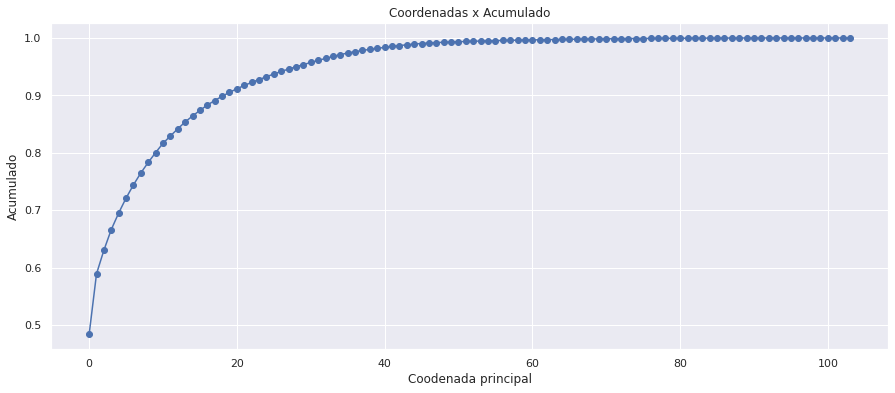

In [109]:
#Visualización de las coordenadas vs lo explicado
plt.rcParams["figure.figsize"] = (15, 6)
plt.plot(eigfamd_1_df['Acum'], 'bo-')
plt.title("Coordenadas x Acumulado")
plt.xlabel("Coodenada principal")
plt.ylabel("Acumulado")
plt.show()

In [110]:
#Se determina la correlación de cada variable con cada componente, para identificar las de mayor asociación
corr_1=famd_1.column_correlations(dff)
corr_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
age,-0.005008,0.238029,0.102389,-0.078898,0.113432,-0.076520,0.073246,-0.080270,-0.071937,-0.094617,-0.053243,-0.051667,-0.084461,-0.032249,-0.072467,-0.072113,-0.059837,0.103318,-0.068057,-0.077156,-0.078684,-0.082514,0.071053,0.077381,-0.070845,-0.076960,0.073392,0.077600,-0.090294,0.042804,0.093600,-0.085712,0.085056,-0.087918,0.069022,-0.071905,0.110034,-0.066933,-0.050472,-0.090101,...,-0.076855,-0.076957,0.075865,0.077044,0.073607,0.074864,-0.077919,0.077964,-0.077418,-0.076257,-0.076756,0.076638,0.073572,0.095678,0.077361,-0.078253,-0.075657,0.084916,0.077320,0.080434,0.085749,0.076948,-0.077335,0.076893,-0.078178,0.071454,-0.077468,-0.078158,0.077310,-0.068310,-0.076856,0.016725,-0.038786,-0.078517,-0.030940,0.030940,-0.030940,-0.030940,-0.030940,0.030940
capital-gain,-0.118856,0.533331,0.167088,0.322271,0.207222,0.119563,0.012139,-0.104008,0.039162,-0.204034,0.261206,0.198427,-0.074240,0.444959,0.025306,0.035976,0.155058,0.374563,0.099790,0.000734,-0.025062,-0.086072,0.002991,-0.041041,0.055430,-0.010352,-0.036844,0.015757,-0.182017,-0.350069,0.136341,-0.113589,0.094612,-0.258606,-0.081941,0.053585,0.571962,0.112771,0.296317,-0.189041,...,-0.005788,-0.007259,-0.010010,0.008336,-0.031942,-0.017306,-0.021877,0.021827,-0.017824,0.001776,-0.004786,0.005093,-0.035987,0.770376,0.011567,-0.027430,0.005608,0.084890,0.012326,0.022992,0.205065,0.005102,-0.014421,0.006480,-0.024459,-0.066477,-0.013308,-0.011195,0.002669,-0.995655,-0.006406,0.793794,0.389132,-0.042988,-0.125146,0.125146,-0.125146,-0.125146,-0.125146,0.125146
capital-loss,-0.008725,0.051909,0.009205,0.004937,0.009574,-0.003211,0.003780,-0.005677,-0.004121,-0.001090,-0.009013,-0.004522,-0.003728,-0.015115,-0.010139,-0.005038,-0.004351,-0.003685,-0.005323,-0.004197,-0.003342,-0.002467,0.001110,0.010707,-0.006227,-0.004155,0.005265,0.004239,-0.000546,0.009277,0.006814,-0.000604,0.001988,0.004551,0.004449,-0.004638,-0.009661,-0.007438,-0.012108,-0.001576,...,-0.005209,-0.003376,0.005125,0.005371,0.004331,0.003173,-0.001899,0.002577,-0.002304,-0.004876,-0.005538,0.003190,0.005221,-0.048196,0.005630,0.000961,0.001597,0.032735,0.003848,0.016071,-0.222784,0.006672,-0.001747,0.002613,-0.001136,0.001824,-0.003348,-0.007114,0.016834,0.107389,-0.004378,0.002896,-0.001630,-0.004261,-0.080972,0.080972,-0.080972,-0.080972,-0.080972,0.080972
education_10th,-0.019499,-0.030480,-0.016996,0.005560,-0.019375,0.007843,-0.012050,0.017078,0.009136,0.015158,0.011853,-0.000676,0.010504,0.055036,0.025065,0.011611,0.032044,-0.014756,0.005989,0.010948,0.011620,0.013166,-0.011309,-0.007324,0.010480,0.011620,-0.010912,-0.011321,0.013990,-0.014294,0.001305,0.003196,-0.012009,0.013326,0.003791,0.013250,-0.026426,0.008924,0.003935,0.014437,...,0.011213,0.011159,-0.010864,-0.011229,-0.010496,-0.010731,0.011423,-0.011431,0.011341,0.011038,0.011167,-0.011135,-0.010426,-0.020065,-0.011286,0.011468,0.010881,-0.012935,-0.011271,-0.011554,-0.010700,-0.011189,0.011278,-0.011153,0.011456,-0.009803,0.011285,0.011309,-0.011288,0.015598,0.011176,-0.007521,0.003323,0.011795,0.271383,-0.271383,0.271383,0.271383,0.271383,-0.271383
education_11th,-0.021018,-0.047677,-0.018367,0.007175,-0.023823,0.008153,-0.010108,0.016775,0.007560,0.016207,0.015307,0.001785,0.009399,0.062206,0.026137,0.009936,0.041411,-0.015464,0.005157,0.009817,0.010860,0.013449,-0.010083,-0.006950,0.009610,0.011789,-0.010963,-0.009597,0.012903,0.034007,-0.043120,0.020787,-0.011851,0.016322,-0.007572,0.009369,-0.025846,0.007172,0.001804,0.014472,...,0.010207,0.010162,-0.009787,-0.010239,-0.009253,-0.009587,0.010504,-0.010518,0.010375,0.009993,0.010159,-0.010117,-0.009186,-0.022994,-0.010320,0.010571,0.009803,-0.012528,-0.010302,-0.010739,-0.010647,-0.010196,0.010313,-0.010156,0.010564,-0.008407,0.010331,0.0104

In [111]:
#Se almacenan las correlaciones para su respectivo analisis.
corr_1.to_csv('/content/gdrive/My Drive/Data Science/EAFIT/Aprendizaje Automático/Trabajo1/Piedrahita - Valderrama - Rueda/Informe técnico III/Correlaciones_unsupervised.csv')

In [112]:
#Identficación de variables en la coordenada 0
maxvar = pd.DataFrame()
maxvar = corr_1[[0]].copy()
maxvar.columns = ['cord_0']
maxvar['cord_0'] = np.abs(maxvar['cord_0'].values)
maxvar = maxvar.sort_values(by=['cord_0'], ascending= False)
maxvar.iloc[0:104,:]

,cord_0
fnlwgt,0.673216
race_White,0.442068
native-country_United-States,0.382071
race_Black,0.350842
workclass_Private,0.296009
...,...
occupation_Armed-Forces,0.011545
native-country_Scotland,0.011076
native-country_Ireland,0.010473
capital-loss,0.008725


In [113]:
#Se grafican las observaciones, considerando las dos primeras coordenadas (componentes)
c_1=famd_1.transform(dff)
c_1=np.array(c_1)

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.decomposition import PCA
import imageio

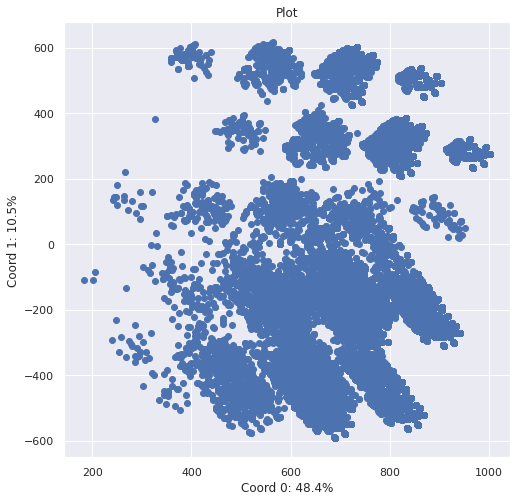

In [115]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(c_1[0:48842,0],c_1[0:48842,1])
plt.title("Plot")
plt.xlabel("Coord 0: 48.4%")
plt.ylabel("Coord 1: 10.5%")
plt.show()

In [116]:
#A continuación, se grafican las primeras tres componentes, para observar, de una mejor manera, los posibles clusters
# Componentes 0, 1 y 2 
x1 = c_1[0:48842,0]
y1 = c_1[0:48842,1]
z1 = c_1[0:48842,2]

x2 = c_1[48842:,0]
y2 = c_1[48842:,1]
z2 = c_1[48842:,2]

<Figure size 480x480 with 0 Axes>

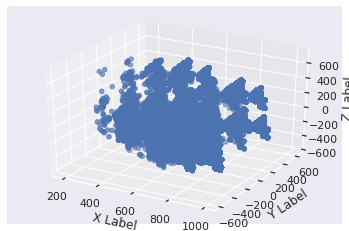

In [117]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='b', marker='o')
ax.scatter(x2, y2, z2, c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


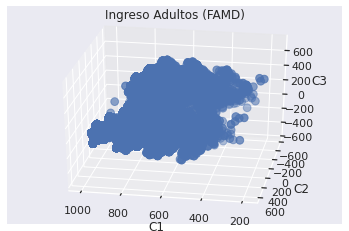

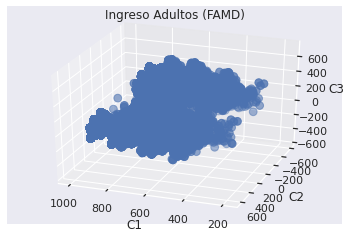

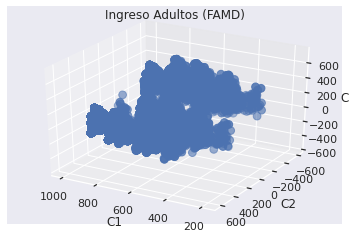

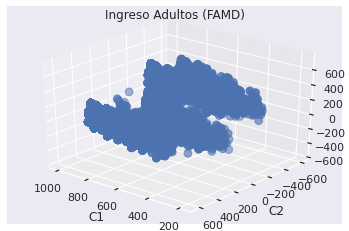

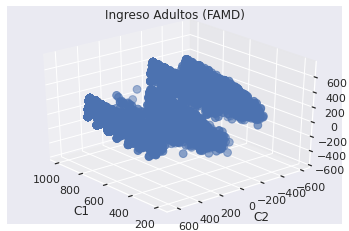

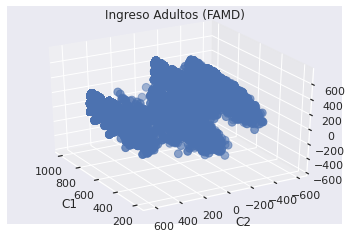

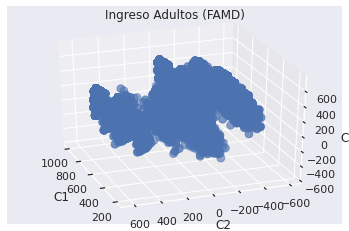

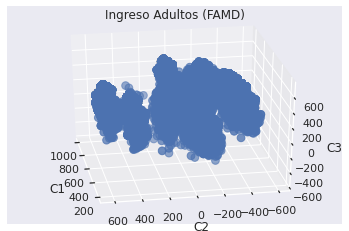

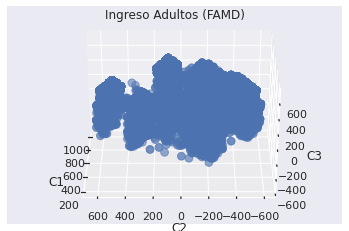

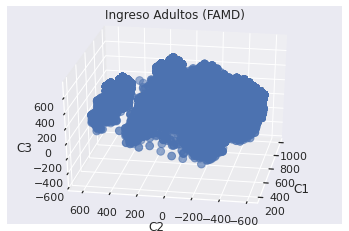

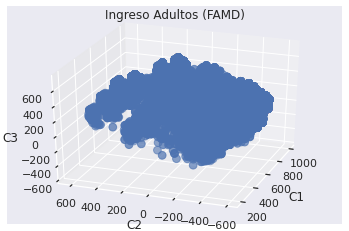

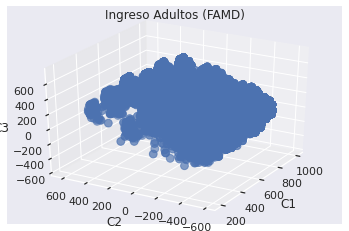

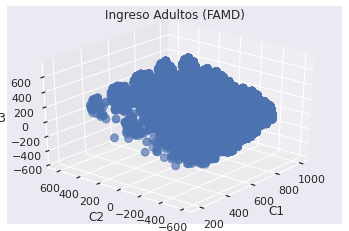

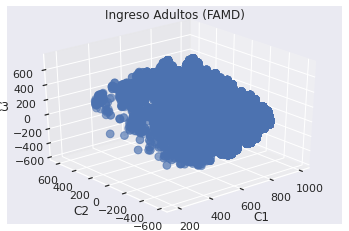

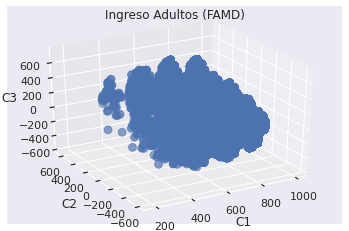

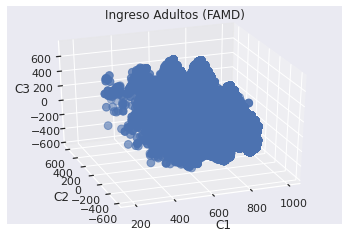

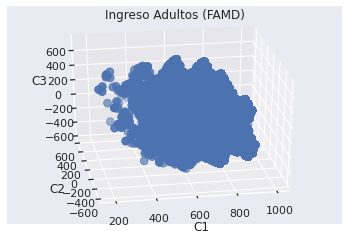

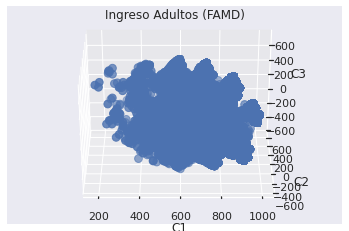

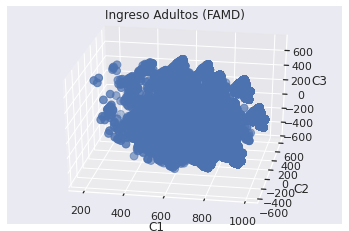

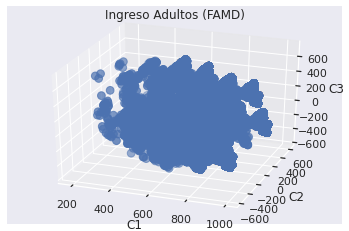

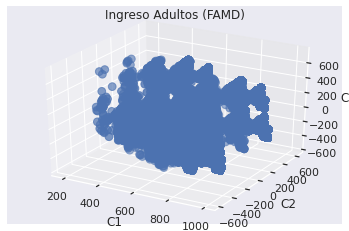

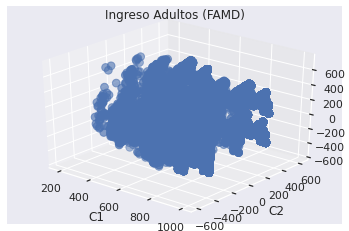

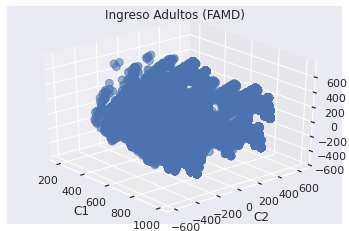

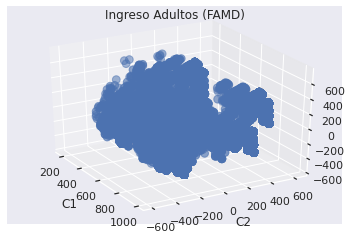

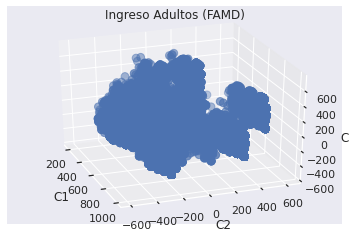

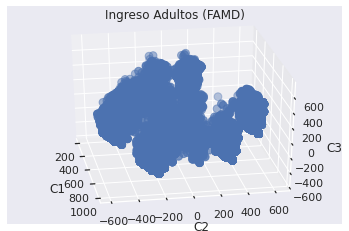

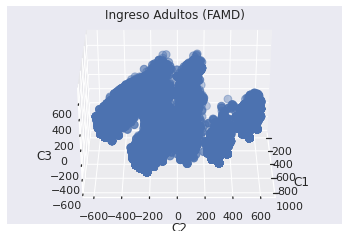

In [118]:
# Se grafican diferentes vistas de las componentes para identificar mejor los posibles clusters.
#https://pierpaolo28.github.io/blog/blog11/
for angle in range(100,370,10):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c='b', cmap="Set2_r", s=60)
    ax.scatter(x2, y2, z2, c='m', cmap="Set2_r", s=60)

    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("C1")
    ax.set_ylabel("C2")
    ax.set_zlabel("C3")
    ax.set_title("Ingreso Adultos (FAMD)")
    filename= '/content/gdrive/My Drive/Data Science/EAFIT/Aprendizaje Automático/Trabajo1/Piedrahita - Valderrama - Rueda/Informe técnico III//Imagenes_FAMD/'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)

In [119]:
#Código para generar un gif en movimiento.
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.35
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [120]:
# Se almacena el gif
make_gif('/content/gdrive/My Drive/Data Science/EAFIT/Aprendizaje Automático/Trabajo1/Piedrahita - Valderrama - Rueda/Informe técnico III/Imagenes_FAMD/','/content/gdrive/My Drive/Data Science/EAFIT/Aprendizaje Automático/Trabajo1/Piedrahita - Valderrama - Rueda/Informe técnico III/Imagenes_FAMD/Ingresos_Adultos_FAMD.gif')

In [ ]:
#Se obtienen las 8 componentes con mayor valor para explicar el modelo (en un 76%)
df_res_famd = pd.DataFrame(c_1[:,0:8])
df_res_famd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48842 non-null  float64
 1   1       48842 non-null  float64
 2   2       48842 non-null  float64
 3   3       48842 non-null  float64
 4   4       48842 non-null  float64
 5   5       48842 non-null  float64
 6   6       48842 non-null  float64
 7   7       48842 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [ ]:
df_res_famd.head(10)

,0,1,2,3,4,5,6,7
0,701.650825,-262.962456,-391.436532,162.892992,-228.307106,225.604462,2.597822,159.315946
1,975.118113,279.728165,-194.335948,-299.369849,-1.879750,23.977571,25.535397,46.106273
2,685.834227,555.802403,164.079400,106.815481,65.357958,-64.366347,188.232831,-143.360231
3,714.736610,453.147686,81.275612,83.049236,-274.729397,108.100978,-321.124535,-34.533494
4,831.213345,-503.541620,140.307618,244.071681,-384.313398,38.145706,158.721614,11.107930
5,870.622884,-289.147993,-258.235301,237.114207,172.817533,13.094001,-104.629398,20.404775
6,766.124093,-249.477240,-267.865612,-82.705910,26.739834,233.585691,67.172650,291.266965
7,715.591717,572.661875,215.925907,179.495012,100.146686,-76.145144,285.790109,14.030982
8,804.448682,-511.971317,163.527846,22.352132,-330.748978,-62.901985,-46.808626,-119.687618
9,935.782084,309.452982,-164.096507,-111.613083,-108.583368,-115.545529,-106.391863,113.083480


In [ ]:
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **K-means**

In [ ]:
X1 = df_res_famd.to_numpy()

**Método Elbow para establecer el número de clusters óptimo.**

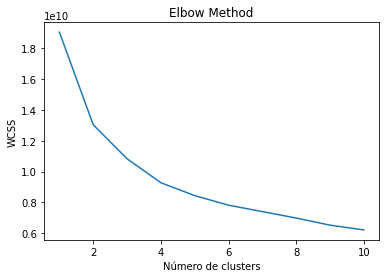

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_res_famd)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

WCSS es la suma de la distancia cuadrada entre cada miembro del cluster y su centroide. De acuerdo al método Elbow, el número de clusters óptimo es de 2, lo que coincide con el conocimiento previo de que existen dos clases (o variables respuesta): ">50k" y "<=50k".

**Parametrización del modelo**

In [ ]:
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from  scipy.cluster.hierarchy import linkage, ward, dendrogram

In [ ]:
# Se instancia el modelo
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df_res_famd)

In [ ]:
# Se ajusta y se predice con el modelo
y_pred = kmeans.fit_predict(df_res_famd)

**Gráfica de los clusters incluyendo los centroides de cada uno**

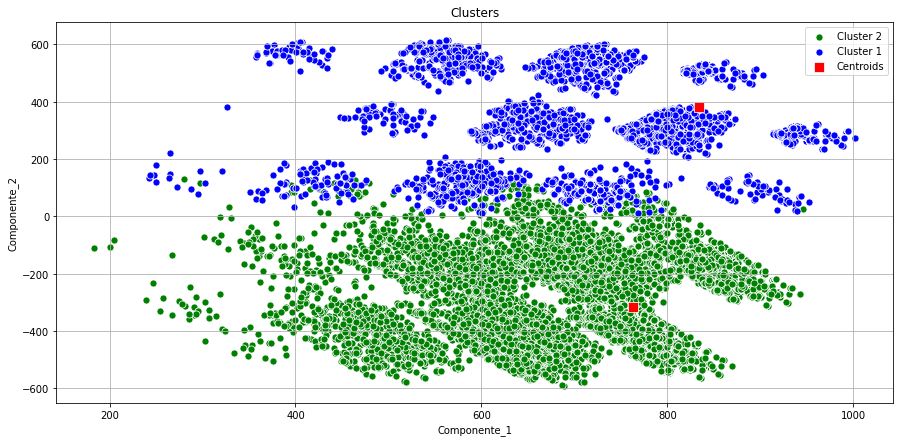

In [ ]:
# Visualising the clusters
import seaborn as sns
plt.figure(figsize=(15,7))
sns.scatterplot(X1[y_pred == 0, 0], X1[y_pred == 0, 1], color = 'green', label = 'Cluster 2',s=50)
sns.scatterplot(X1[y_pred == 1, 0], X1[y_pred == 1, 1], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(True)
plt.title('Clusters')
plt.xlabel('Componente_1')
plt.ylabel('Componente_2')
plt.legend()
plt.show()

**Validación del modelo**

In [ ]:
correct = 0
for i in range(len(df_res_famd)):
    predict_me = np.array(X1[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_df['income'][i]:
        correct += 1
print('Exactitud del modelo: {:.4f}'.format(correct/len(df_res_famd)))

Exactitud del modelo: 0.7434


In [ ]:
# Se define DataFrame con las etiquetas de las predicciones
df_km_clusters = pd.DataFrame(kmeans.labels_, columns=["cluster"])

In [ ]:
# Unir label original y label de cluster
result_km = pd.concat([y_df, df_km_clusters], axis=1, sort=False)

In [ ]:
# Obtener resultado agrupado, cantidad de observaciones por clase en cada cluster
agrupado = result_km.groupby(['cluster', 'income']).size().to_frame(name = 'count').reset_index()
agrupado

,cluster,income,count
0,0,0,26128
1,0,1,1505
2,1,0,11027
3,1,1,10182


Se puede apreciar que se tienen 26128 aciertos de ingresos <50K. Se tienen 10182 aciertos de ingresos >50K.

In [ ]:
Sum_cluster = agrupado.groupby(['cluster'])['count'].sum()
Sum_tot = agrupado['count'].sum()

**EVALUACION EXTERNA** 

Índice de Rand: Calcula qué tan similares son los clústeres (devueltos por el algoritmo de agrupamiento) a las clasificaciones de referencia. También se puede ver el índice Rand como una medida del porcentaje de decisiones correctas tomadas por el algoritmo

In [ ]:
indice_rand = (agrupado['count'][0] + agrupado['count'][3])/Sum_tot
indice_rand

0.7434175504688588

Entropia: Es el grado de coincidencia de los clusters a las clases ya definidas de los datos originales.

In [ ]:
#Entropia del cluester 0 (<50K)
from scipy.stats import entropy
entropia_c0 = entropy([agrupado['count'][0]/Sum_cluster[0], agrupado['count'][1]/Sum_cluster[0]], base=2)
entropia_c0

0.30506470055614854

In [ ]:
#Entropia del cluester 1 (>50K)
entropia_c1 = entropy([agrupado['count'][3]/Sum_cluster[1], agrupado['count'][2]/Sum_cluster[1]], base=2)
entropia_c1

0.9988546650034806

In [ ]:
#Entropia Total
entropia_total = (entropia_c0 * (Sum_cluster[0]/Sum_tot)) + (entropia_c1 * (Sum_cluster[1]/Sum_tot))
entropia_total

0.6063339228640694

Este resultado de 0.6 indica el nivel de coincidencia de los clusters, es decir que los cluster conservan cierta superposición, la cual fue evidenciada en las graficas realizadas.

**Evaluación Interna**

Coeficiente de silueta: contrasta la distancia media a elementos en el mismo grupo con la distancia media a elementos en otros grupos. Es una métrica limitada entre [-1,1]: -1 para la agrupación incorrecta y 1 para la agrupación muy densa (densa y bien separada),los valores alrededor de cero indican agrupaciones superpuestas

In [ ]:
# Evaluar el coeficiente de silueta
preds = kmeans.fit_predict(df_res_famd)
ss = silhouette_score(df_res_famd, preds)
print('Coeficiente de silueta ', ss)

Coeficiente de silueta  0.3016368393277958


Como se puede observar, no es una agrupación incorrecta (negativa), pero tampoco es una agrupación densa o separada. Tiene un valor de 0,3 que indica que una agrupación con cierto grado de superposición como se pudo evidenciar en las graficas

# **DBSCAN**

Para comprender DBSCAN con más detalle, profundicemos en él. El concepto principal del algoritmo DBSCAN es localizar regiones de alta densidad que están separadas entre sí por regiones de baja densidad.
https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Inicialmente buscamos el epsilon mas indicado para nuestros datos
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

In [ ]:
#Se calculan distancias para cada punto por medio del algoritmo de vecinos más cercanos.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_res_famd)
distances, indices = nbrs.kneighbors(df_res_famd)

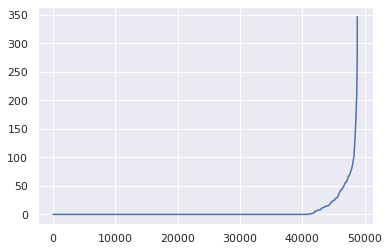

In [ ]:
#Se pintan las distancias y donde la curvatura sea mas extrema, se identifica el epsilon. En nuestro caso será 50
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=50, min_samples=100).fit(df_res_famd)
df_db_clusters = pd.DataFrame(dbscan.labels_, columns=["cluster"])
result_db = pd.concat([y_df, df_db_clusters], axis=1, sort=False)
result_db.groupby(['cluster']).count()

,income
cluster,
-1,25840
0,1431
1,213
2,269
3,154
...,...
83,111
84,124
85,108


In [ ]:
dbscan = DBSCAN(eps=50, min_samples=700).fit(df_res_famd)
df_db_clusters = pd.DataFrame(dbscan.labels_, columns=["cluster"])
result_db = pd.concat([y_df, df_db_clusters], axis=1, sort=False)
result_db.groupby(['cluster']).count()

,income
cluster,
-1,45805
0,801
1,1431
2,805


Como puede observarse en los resultados de las dos pruebas generadas para el algoritmo DBSCAN (tanto para 100 como para 700 minimos vecinos), los datos de ruido (marcados con -1) son muchísimos. Superan en ambos casos el 90% del total de datos. Por otro lado si se disminuye aun más el limite de vecinos (por ejemplo 50), podriamos tener un numero menor de ruido pero se incrementa considerablemente el numero de clusters, y debido a la naturaleza de nuestro dataset y la variable resultado esperada no es conveniente. En conclusión debido a la distribución y valor de las variables de nuestro DataSet, este algoritmo no es conveniente.

# **Jerarquico Aglomerativo**

En esta técnica, inicialmente cada punto de datos se considera como un grupo individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forman uno o K grupos. Debido a que con toda la cantidad de datos (48842) google colab colapsa por temas de memoria, se toman los primeros 30.000 registros para realizar el analisis. 

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
X1_hc = df_res_famd[0:30000][:].to_numpy()

In [ ]:
#Empleados el método de Ward para la similitud de los grupos, distancia euclidea y 2 clusters
#El enfoque del método de Ward también funciona bien para separar grupos si hay ruido entre ellos
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward') 

In [ ]:
agglom = hc.fit(df_res_famd[0:30000][:])

In [ ]:
jerarquico = hc.fit_predict(df_res_famd[0:30000][:])

In [ ]:
# Obtener label de cluster para cada observación
df_jq_clusters = pd.DataFrame(jerarquico, columns=["cluster"])

# Unir label original y label de cluster
result_jq = pd.concat([y_df[0:30000][:], df_jq_clusters], axis=1, sort=False)

# Obtener resultado agrupado, cantidad de observaciones por clase en cada cluster
agrupado = result_jq.groupby(['cluster', 'income']).size().to_frame(name = 'count').reset_index()
agrupado

,cluster,income,count
0,0,0,16136
1,0,1,1709
2,1,0,6734
3,1,1,5421


In [ ]:
# Calcular categoría de mayor frecuencia en el cluster
idx = agrupado.groupby(['cluster'])['count'].transform(max) == agrupado['count']
equivalencia_clusters = agrupado[idx]
equivalencia_clusters

,cluster,income,count
0,0,0,16136
2,1,0,6734


In [ ]:
# Evaluar la pureza de la agrupación
pureza = agrupado[idx]['count'].sum()/result_jq.shape[0]
print('Pureza ', pureza)

Pureza  0.7623333333333333


In [ ]:
# Evaluar el coeficiente de silueta
ss = silhouette_score(df_res_famd[0:30000][:], df_jq_clusters.values)
ss

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2983910670455643

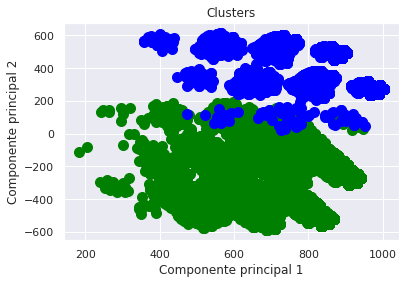

In [ ]:
plt.scatter(X1_hc[jerarquico==0, 0], X1_hc[jerarquico==0, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X1_hc[jerarquico==1, 0], X1_hc[jerarquico==1, 1], s=100, c='blue', label ='Cluster 1')
plt.title('Clusters')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

Como puede observarse en el grafico, los resultados son concluyentes. Aunque se ven superpuestos, hay dos clusters claramente definidos, muy similar a los resultados obtenidos con el algoritmo de kmeans. 

In [ ]:
model2 = ward(df_res_famd[0:30000][:]) # metodo complete

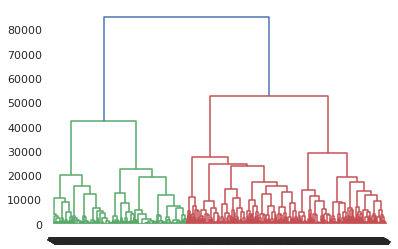

In [ ]:
dendrogram(model2,
           labels=None,
           leaf_rotation=150,
           leaf_font_size=3,
)
plt.show()